# TELCO CUSTOMER CHURN PREDICTION

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

##### Fetching the churn dataset

In [2]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
dataset.shape

(7043, 21)

THE TOTAL NO. OF ROWS PRESENT ARE 7043 AND NO. OF COLUMNS ARE 21

###### Columns

In [4]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
dataset.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

#### Checking the datatype of each column

In [6]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###### SINCE, THE TOTAL CHARGES COLUMN IS OF OBJECT TYPE WE NEED TO CHANGE IT INTO FLOAT TYPE

###### Removing any white spaces if present

In [7]:
dataset['TotalCharges'] = dataset['TotalCharges'].str.replace(' ','')

##### Changing to numeric type

In [8]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [9]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Checking for any NULL values

In [10]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

SO, THERE ARE 11 NULL VALUES IN TOTAL CHARGES COLUMN

##### Removing the NULL values

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

NULL VALUES ARE REMOVED

In [13]:
dataset.shape

(7032, 21)

## Exploratory Data Analysis

In [14]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### PREDICTOR COLUMN(CHURN)

In [15]:
dataset['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [16]:
dataset['Churn'].value_counts(normalize=True).mul(100)

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

<AxesSubplot:>

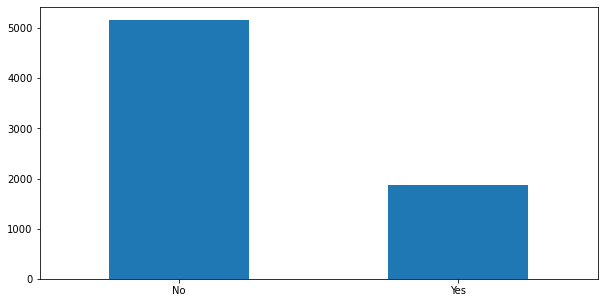

In [17]:
dataset['Churn'].value_counts().plot(kind='bar',figsize=(10,5),rot=0)

<AxesSubplot:ylabel='Churn'>

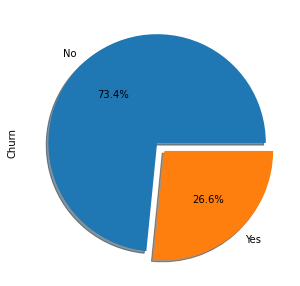

In [18]:
dataset['Churn'].value_counts(normalize=True).mul(100).plot(kind='pie',autopct='%.1f%%',figsize=(10,5),explode=(0,0.1),shadow=True)

### So, there are 26.6% churn customers in our dataset

#### Now, we need to convert the predictor variable to binary numeric variable

In [19]:
def change(x):
    if x == 'No':
        return 0
    else:
        return 1

In [20]:
dataset['Churn'] = dataset['Churn'].apply(change)

In [21]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Now, we need to analyze each column

#### Gender

In [22]:
dataset['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [23]:
dataset['gender'].value_counts(normalize=True).mul(100)

Male      50.469283
Female    49.530717
Name: gender, dtype: float64

<AxesSubplot:>

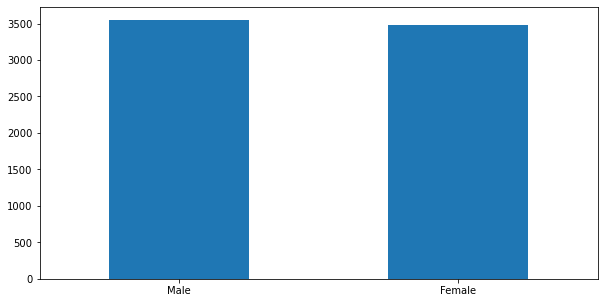

In [24]:
dataset['gender'].value_counts().plot(kind='bar',figsize=(10,5),rot=0)

<AxesSubplot:ylabel='gender'>

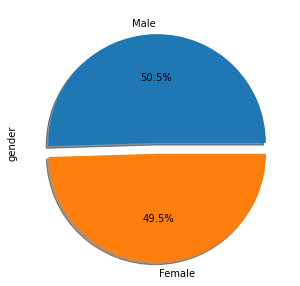

In [25]:
dataset['gender'].value_counts(normalize=True).mul(100).plot(kind='pie',autopct='%.1f%%',figsize=(10,5),explode=(0,0.1),shadow=True)

### Both the genders are approx. equally divided in our dataset

In [26]:
dataset['gender'].replace(to_replace='Male', value=1, inplace=True)
dataset['gender'].replace(to_replace='Female',  value=0, inplace=True)

In [27]:
dataset['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7032, dtype: int64

#### Senior citizen

In [28]:
dataset['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [29]:
dataset['SeniorCitizen'].value_counts(normalize=True).mul(100)

0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64

<AxesSubplot:>

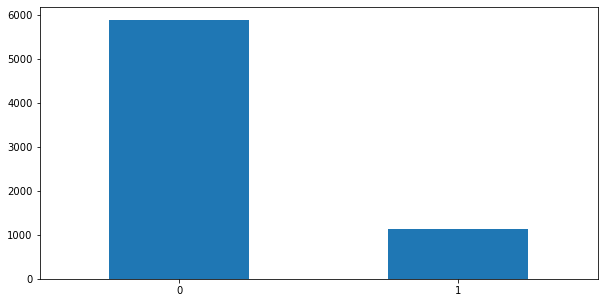

In [30]:
dataset['SeniorCitizen'].value_counts().plot(kind='bar',figsize=(10,5),rot=0)

<AxesSubplot:ylabel='SeniorCitizen'>

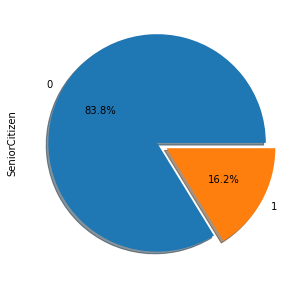

In [31]:
dataset['SeniorCitizen'].value_counts(normalize=True).mul(100).plot(kind='pie',autopct='%.1f%%',figsize=(10,5),explode=(0,0.1),shadow=True)

### Around 16.2% of our customers are senior citizens

#### Partner and Dependents

In [32]:
dataset['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [33]:
dataset['Partner'].value_counts(normalize=True).mul(100)

No     51.749147
Yes    48.250853
Name: Partner, dtype: float64

In [34]:
dataset['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [35]:
dataset['Dependents'].value_counts(normalize=True).mul(100)

No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64

<AxesSubplot:>

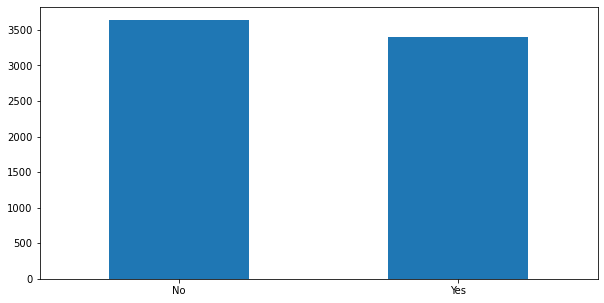

In [36]:
dataset['Partner'].value_counts().plot(kind='bar', figsize=(10,5),rot=0)

<AxesSubplot:ylabel='Partner'>

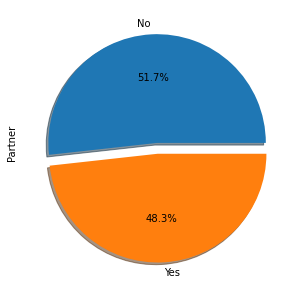

In [37]:
dataset['Partner'].value_counts(normalize=True).mul(100).plot(kind='pie',autopct='%.1f%%',figsize=(10,5),explode=(0,0.1),shadow=True)

### 51.7% customers don't have partners while 48.3% customers have it

<AxesSubplot:>

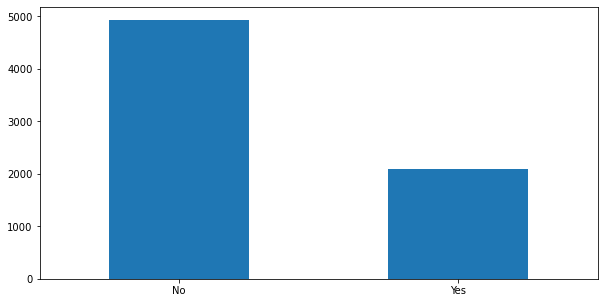

In [38]:
dataset['Dependents'].value_counts().plot(kind='bar', figsize=(10,5),rot=0)

<AxesSubplot:ylabel='Dependents'>

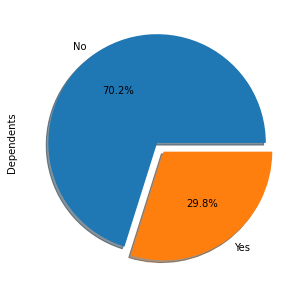

In [39]:
dataset['Dependents'].value_counts(normalize=True).mul(100).plot(kind='pie',autopct='%.1f%%',figsize=(10,5),explode=(0,0.1),shadow=True)

### 29.8% customers have dependents

In [40]:
dataset['Partner'].replace(to_replace='Yes', value=1, inplace=True)
dataset['Partner'].replace(to_replace='No',  value=0, inplace=True)

In [41]:
dataset['Partner']

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64

In [42]:
dataset['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
dataset['Dependents'].replace(to_replace='No',  value=0, inplace=True)

In [43]:
dataset['Dependents']

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64

#### All different services used by the customers

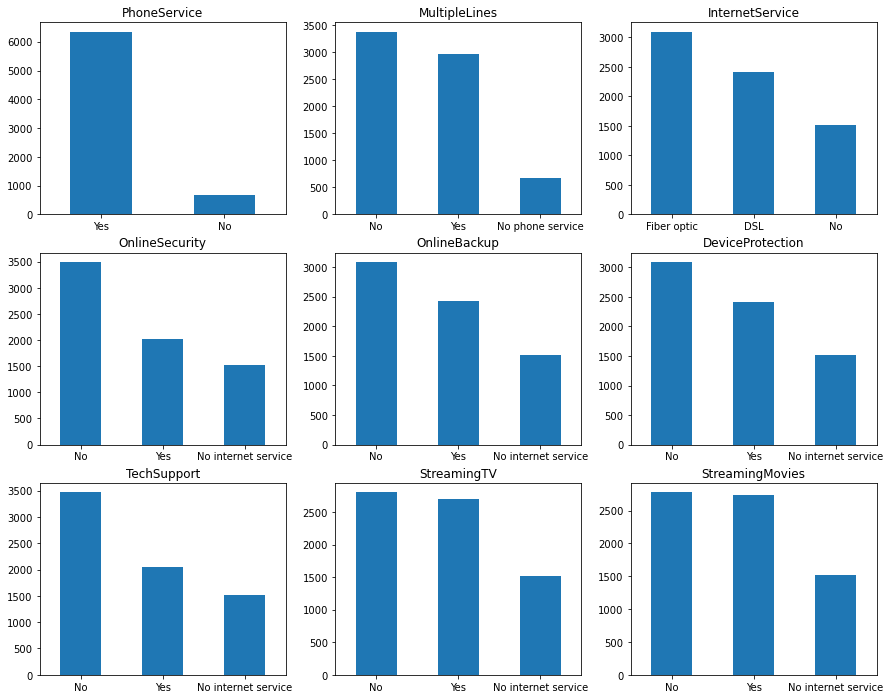

In [44]:
services_columns = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, service in enumerate(services_columns):
    if i < 3:
        ax = dataset[service].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0)
        
    elif i >=3 and i < 6:
        ax = dataset[service].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0)
        
    elif i < 9:
        ax = dataset[service].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0)
    ax.set_title(service)


#### Billing Type and Payment Method

In [45]:
dataset['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [46]:
dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Text(0.5, 1.0, 'PaymentMethod')

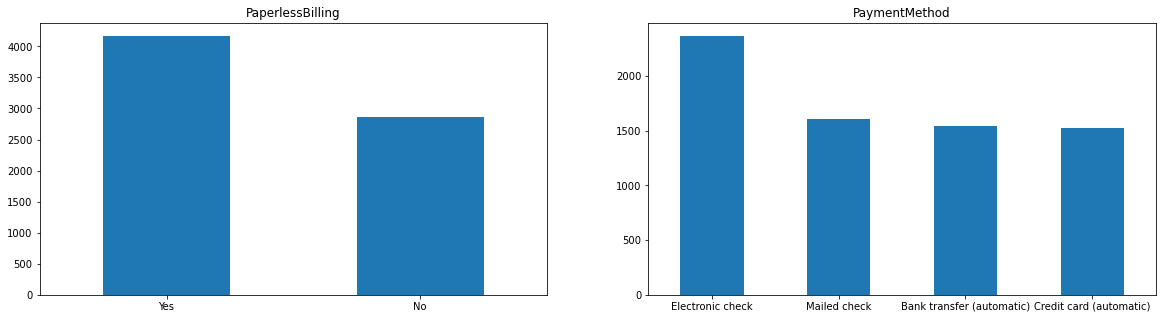

In [47]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(20,5))
dataset['PaperlessBilling'].value_counts().plot(kind = 'bar',ax=ax1,rot = 0)
dataset['PaymentMethod'].value_counts().plot(kind = 'bar',ax=ax2,rot = 0)
ax1.set_title('PaperlessBilling')
ax2.set_title('PaymentMethod')

Text(0.5, 1.0, 'PaymentMethod')

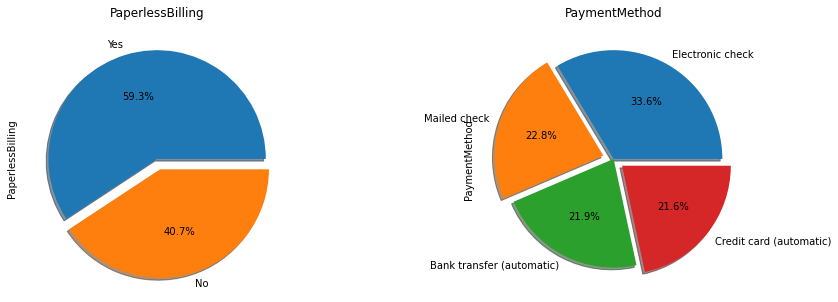

In [48]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
dataset['PaperlessBilling'].value_counts().plot(kind = 'pie',autopct='%.1f%%',explode=(0,0.1),shadow=True,ax=ax1,rot = 0)
dataset['PaymentMethod'].value_counts().plot(kind = 'pie',autopct='%.1f%%',explode=(0,0.1,0,0.1),shadow=True,ax=ax2,rot = 0)
ax1.set_title('PaperlessBilling')
ax2.set_title('PaymentMethod')

#### Tenure and Contract

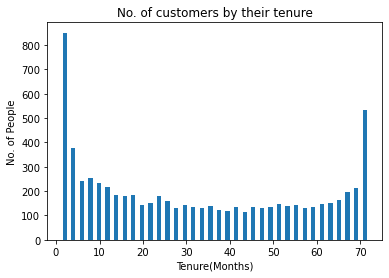

In [49]:
plt.hist(dataset['tenure'],bins=int(180/5),histtype='bar',rwidth=0.5)
plt.xlabel('Tenure(Months)')
plt.ylabel('No. of People')
plt.title('No. of customers by their tenure')
plt.show()

In [50]:
dataset['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:>

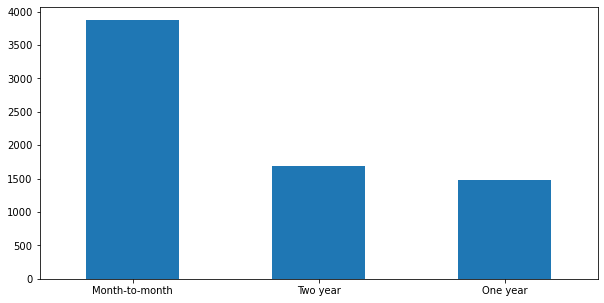

In [51]:
dataset['Contract'].value_counts().plot(kind='bar', figsize=(10,5),rot=0)

<AxesSubplot:ylabel='Contract'>

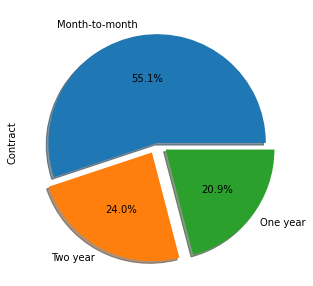

In [52]:
dataset['Contract'].value_counts(normalize=True).mul(100).plot(kind='pie',autopct='%.1f%%',figsize=(10,5),explode=(0,0.1,0.1),shadow=True)

### Monthly Charges VS Total Charges

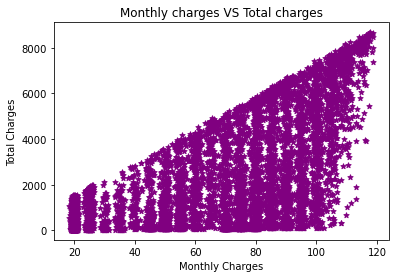

In [53]:
plt.scatter(dataset['MonthlyCharges'],dataset['TotalCharges'],marker='*',color='purple',s=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly charges VS Total charges')
plt.show()

##### With increase in monthly charges, total charges is also increasing

### Churn with tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

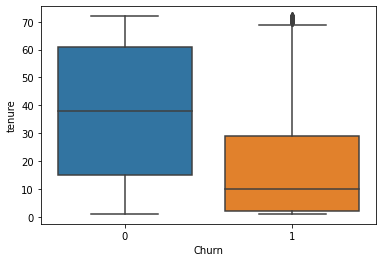

In [54]:
sns.boxplot(dataset['Churn'],dataset['tenure'])

### Churn vs contract

<AxesSubplot:xlabel='Contract'>

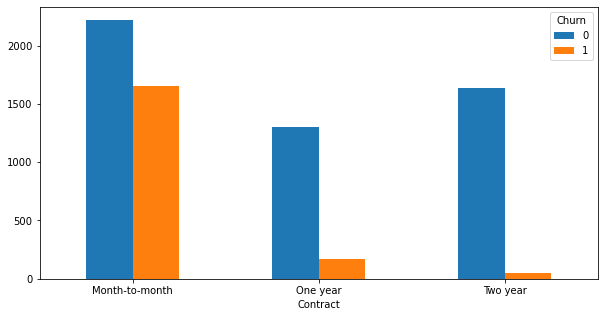

In [55]:
dataset.groupby(['Contract','Churn']).size().unstack('Churn').plot(kind='bar',figsize=(10,5),rot=0)

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

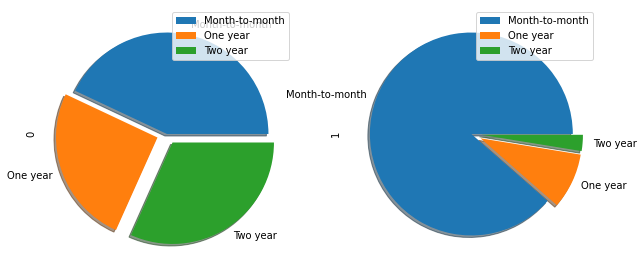

In [56]:
dataset.groupby(['Contract','Churn']).size().unstack('Churn').plot(kind='pie',subplots=True,explode=(0,0.1,0.1),shadow=True,figsize=(10,5),rot=0)

CUSTOMERS HAVING 2 YEARS OF CONTRACT HAVE THE LEAST CHURN AS PER OUR DATASET

### Churn VS Monthly Charges

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

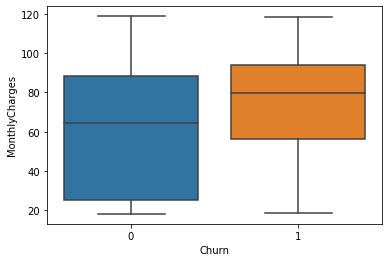

In [57]:
sns.boxplot(dataset['Churn'],dataset['MonthlyCharges'])

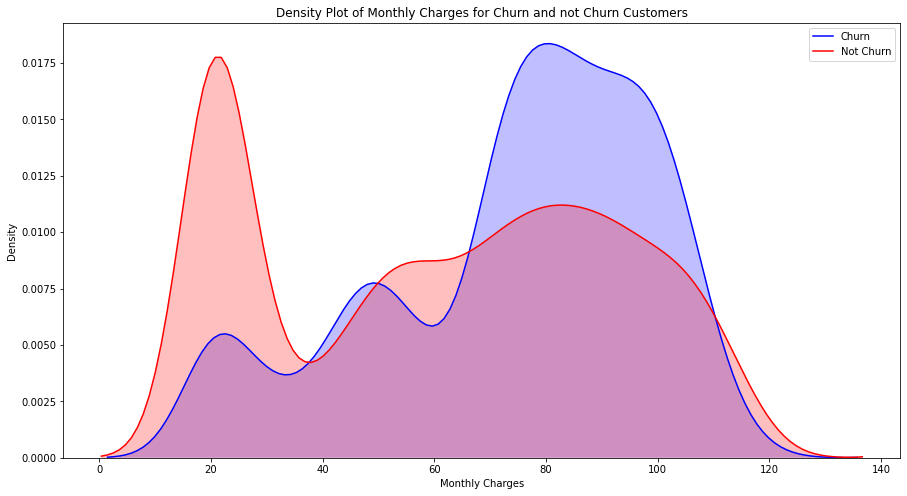

In [58]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset["MonthlyCharges"][dataset.Churn == 1], color="blue", shade=True)
sns.kdeplot(dataset["MonthlyCharges"][dataset.Churn == 0], color="red", shade=True)
plt.legend(['Churn', 'Not Churn'])
plt.title('Density Plot of Monthly Charges for Churn and not Churn Customers')
ax.set(xlabel='Monthly Charges')
ax.set(ylabel='Density')
plt.show()

### Churn VS Total Charges

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

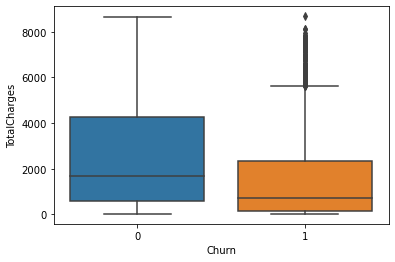

In [59]:
sns.boxplot(dataset['Churn'],dataset['TotalCharges'])

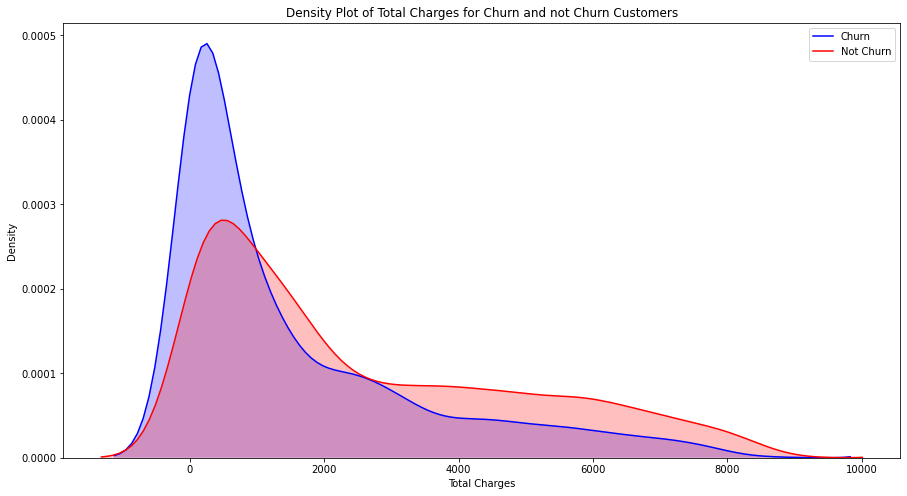

In [60]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset["TotalCharges"][dataset.Churn == 1], color="blue", shade=True)
sns.kdeplot(dataset["TotalCharges"][dataset.Churn == 0], color="red", shade=True)
plt.legend(['Churn', 'Not Churn'])
plt.title('Density Plot of Total Charges for Churn and not Churn Customers')
ax.set(xlabel='Total Charges')
ax.set(ylabel='Density')
plt.show()

### Encoding the columns

In [61]:
dataset['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)
dataset['PhoneService'].replace(to_replace='No',  value=0, inplace=True)

In [62]:
dataset['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7032, dtype: int64

In [63]:
items = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [64]:
encoded_columns = pd.get_dummies(dataset[items])
encoded_columns.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [65]:
dataset = dataset.join(encoded_columns).drop(items,axis=1)

In [66]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,29.85,29.85,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,56.95,1889.50,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,53.85,108.15,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,42.30,1840.75,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,70.70,151.65,1,...,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,99.65,820.50,1,...,1,1,0,0,0,1,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,89.10,1949.40,0,...,0,1,0,0,0,1,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,29.75,301.90,0,...,0,1,0,0,1,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,104.80,3046.05,1,...,1,1,0,0,0,1,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,56.15,3487.95,0,...,0,0,1,0,1,0,1,0,0,0


### Checking for correlation of Churn with other columns

In [67]:
dataset.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines_No phone service            -0.011691
MultipleLine

<AxesSubplot:>

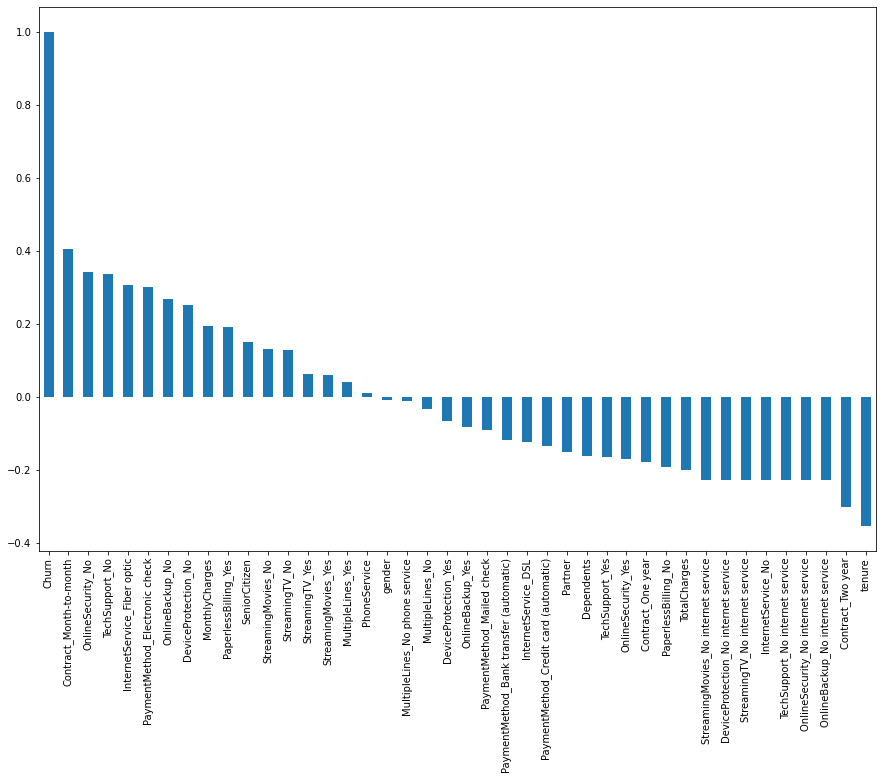

In [68]:
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',figsize=(15,10))

### Re-shifting the churn column to the end

In [69]:
dataset = dataset[[c for c in dataset if c not in ['Churn']] 
       + ['Churn']]

In [70]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,0,0,1,0,1,0,29.85,29.85,0,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,56.95,1889.50,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,53.85,108.15,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,1,0,0,0,45,0,42.30,1840.75,0,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,70.70,151.65,1,...,1,0,0,0,1,0,0,1,0,1


### Standardization

In [71]:
list1 = ['tenure','MonthlyCharges','TotalCharges']
for i in list1:
    dataset[i] = (dataset[i] - dataset[i].mean()) / dataset[i].std()

In [72]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,0,0,1,0,-1.280157,0,-1.161611,-0.994123,0,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,0.064298,1,-0.260859,-0.173727,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,-1.239416,1,-0.363897,-0.959581,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,1,0,0,0,0.512450,0,-0.747797,-0.195234,0,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,-1.239416,1,0.196164,-0.940391,1,...,1,0,0,0,1,0,0,1,0,1


In [73]:
X = dataset[[c for c in dataset if c not in ['customerID','Churn']]]

In [74]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280157,0,-1.161611,-0.994123,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,0.064298,1,-0.260859,-0.173727,1,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,-1.239416,1,-0.363897,-0.959581,1,0,...,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0.512450,0,-0.747797,-0.195234,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,-1.239416,1,0.196164,-0.940391,1,0,...,0,1,0,0,0,1,0,0,1,0


In [75]:
y = dataset['Churn']

In [76]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

#### Splitting into train and test dataset

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Applying KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
kc = KNeighborsClassifier()

In [81]:
kc.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
prediction = kc.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.7683013503909026


##### Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [84]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [85]:
knn_cv.best_score_

0.799201311063055

In [86]:
knn_cv.best_params_

{'n_neighbors': 46}

THE BEST ACCURACY OF OUR KNN CLASSIFIER IS ACHIEVED BY TAKING 46 NEIGHBORS WITH ACCURACY OF 79.9% i.e. ABOUT 80%

### Applying Logistics Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression()

In [89]:
lr.fit(X_train,y_train)

LogisticRegression()

In [90]:
prediction = lr.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.806680881307747


In [91]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



### Applying Gaussian Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
model = GaussianNB()

In [94]:
model.fit(X_train,y_train)

GaussianNB()

In [95]:
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.6979388770433547


In [96]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1038
           1       0.46      0.86      0.60       369

    accuracy                           0.70      1407
   macro avg       0.69      0.75      0.68      1407
weighted avg       0.80      0.70      0.72      1407



### Applying Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dc = DecisionTreeClassifier()

In [99]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
prediction = dc.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.7249466950959488


In [101]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1038
           1       0.48      0.49      0.48       369

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



### Applying Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rc = RandomForestClassifier()

In [104]:
rc.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
prediction = rc.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.7910447761194029


In [106]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<AxesSubplot:>

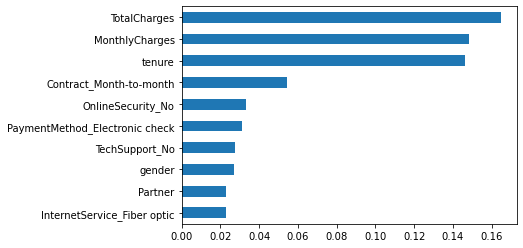

In [107]:
importances = rc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [108]:
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.16457558766037855, 'TotalCharges'), (0.14820793112635078, 'MonthlyCharges'), (0.1462804982039974, 'tenure'), (0.05439447148339196, 'Contract_Month-to-month'), (0.03307042758042629, 'OnlineSecurity_No'), (0.03130318460256741, 'PaymentMethod_Electronic check'), (0.027348626266356816, 'TechSupport_No'), (0.02702701169622541, 'gender'), (0.022829445204016308, 'Partner'), (0.02280459817777373, 'InternetService_Fiber optic'), (0.021324930846669195, 'SeniorCitizen'), (0.01903420919497547, 'Dependents'), (0.017995575777638096, 'Contract_Two year'), (0.017612483726404112, 'OnlineBackup_No'), (0.01574450906146445, 'PaperlessBilling_Yes'), (0.015196742521259127, 'DeviceProtection_No'), (0.014050575104034206, 'PaperlessBilling_No'), (0.013920546549079975, 'MultipleLines_No'), (0.013102789078509624, 'PaymentMethod_Credit card (automatic)'), (0.013049050574814617, 'MultipleLines_Yes'), (0.012154980191621631, 'PaymentMethod_Bank transfer (automatic)'), (0.01191348822996

##### Hyperparameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,200],'max_depth':[1,3,5]}

In [110]:
rc = RandomForestClassifier()
rc_cv= GridSearchCV(rc,param_grid,cv=5)
rc_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5], 'n_estimators': [100, 200]})

In [111]:
rc_cv.best_score_

0.7956473474933805

In [112]:
rc_cv.best_params_

{'max_depth': 5, 'n_estimators': 200}

### Applying ADA Boost

In [113]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [114]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [115]:
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.8088130774697939


In [116]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.67      0.54      0.60       369

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



### Applying XG Boost

In [117]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [118]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.783226723525231


In [120]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1038
           1       0.60      0.50      0.55       369

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



##### Hyperparameter tuning

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,200],'learning_rate':[0.05, 0.1, 0.2],'max_depth':[1,3,5]}

In [122]:
xg = XGBClassifier()
xg_cv= GridSearchCV(xg,param_grid,cv=5)
xg_cv.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [123]:
xg_cv.best_score_

0.8054584828347593

In [124]:
xg_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

### Applying SVM

In [125]:
from sklearn.svm import SVC

In [126]:
sv = SVC(kernel='linear')

In [127]:
sv.fit(X_train,y_train)

SVC(kernel='linear')

In [128]:
prediction = sv.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.7981520966595593


In [129]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1038
           1       0.64      0.53      0.58       369

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



## So, the best accuracy is achieved by our ADA Boost model which is 81% followed by Logistic Regression Model & XG Boost model with accuracies of 80% each.